# Stroke Risk Classification using Machine Learning

This notebook explores stroke risk classification using patient symptom and demographic data. The goal was to train and compare different machine learning models and understand the data's influence on their performance.

**In this notebook, we will see how to:** Explore dataset, Train multiple machine learning models and evaluate them, Use cross-validation with AUC and F1 metrics, Detect dominant features and analyze their impact, Apply PCA for visual intuition of feature importance, Visualize decision trees.

**We'll also discover:** How strong features like age can dominate model decisions, Why very high performance might not always mean data leakage, How to investigate and explain "too good to be true" results ⛦.

In [1]:
# Import all required libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.pipeline import Pipeline

#models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

#metrics
from sklearn.metrics import roc_auc_score,confusion_matrix, f1_score, RocCurveDisplay

#plots
import matplotlib.pyplot as plt
import seaborn as sns

 ## Upload The Dataset

In [2]:
import pandas as pd
df=pd.read_csv('/kaggle/input/stroke-risk-prediction-dataset/stroke_risk_dataset.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Chest Pain                      70000 non-null  int64  
 1   Shortness of Breath             70000 non-null  int64  
 2   Irregular Heartbeat             70000 non-null  int64  
 3   Fatigue & Weakness              70000 non-null  int64  
 4   Dizziness                       70000 non-null  int64  
 5   Swelling (Edema)                70000 non-null  int64  
 6   Pain in Neck/Jaw/Shoulder/Back  70000 non-null  int64  
 7   Excessive Sweating              70000 non-null  int64  
 8   Persistent Cough                70000 non-null  int64  
 9   Nausea/Vomiting                 70000 non-null  int64  
 10  High Blood Pressure             70000 non-null  int64  
 11  Chest Discomfort (Activity)     70000 non-null  int64  
 12  Cold Hands/Feet                 

In [3]:
df.head()

,Chest Pain,Shortness of Breath,Irregular Heartbeat,Fatigue & Weakness,Dizziness,Swelling (Edema),Pain in Neck/Jaw/Shoulder/Back,Excessive Sweating,Persistent Cough,Nausea/Vomiting,High Blood Pressure,Chest Discomfort (Activity),Cold Hands/Feet,Snoring/Sleep Apnea,Anxiety/Feeling of Doom,Age,Stroke Risk (%),At Risk (Binary)
0,0,1,1,1,0,0,0,1,1,1,0,1,1,0,0,54,58.0,1
1,0,0,1,0,0,1,0,0,0,0,1,0,1,1,0,49,40.5,0
2,1,0,0,1,1,1,0,0,1,0,0,0,0,1,0,62,52.0,1
3,1,0,1,1,0,1,1,1,1,1,1,0,0,0,0,48,60.0,1
4,0,0,1,0,0,1,0,1,0,1,1,0,0,1,1,61,56.5,1


In [4]:
df.describe()

,Chest Pain,Shortness of Breath,Irregular Heartbeat,Fatigue & Weakness,Dizziness,Swelling (Edema),Pain in Neck/Jaw/Shoulder/Back,Excessive Sweating,Persistent Cough,Nausea/Vomiting,High Blood Pressure,Chest Discomfort (Activity),Cold Hands/Feet,Snoring/Sleep Apnea,Anxiety/Feeling of Doom,Age,Stroke Risk (%),At Risk (Binary)
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,0.501871,0.496471,0.498886,0.500100,0.503043,0.500557,0.499186,0.503671,0.500800,0.501943,0.500643,0.499557,0.498871,0.500686,0.499871,54.056429,55.558771,0.649200
std,0.500000,0.499991,0.500002,0.500004,0.499994,0.500003,0.500003,0.499990,0.500003,0.500000,0.500003,0.500003,0.500002,0.500003,0.500004,21.071567,14.300898,0.477224
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000,5.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,36.000000,45.500000,0.000000
50%,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,54.000000,55.500000,1.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,72.000000,66.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,90.000000,100.000000,1.000000


The features here are all binary {0,1} values execpt for the Age of type integer that ranges 
from 18 yo to 90 yo. For the target we have "stroke risk" in % (5% -> 100%) and "At Risk" target feature of type binary {0,1}.

## Preprocessing Steps

In [5]:
# Check for class imbalance
df['At Risk (Binary)'].value_counts()/len(df)

At Risk (Binary)
1    0.6492
0    0.3508
Name: count, dtype: float64

In [6]:
# Missing values  --> no missing values
print("Missing Values:\n", df.isnull().sum())

Missing Values:
 Chest Pain                        0
Shortness of Breath               0
Irregular Heartbeat               0
Fatigue & Weakness                0
Dizziness                         0
Swelling (Edema)                  0
Pain in Neck/Jaw/Shoulder/Back    0
Excessive Sweating                0
Persistent Cough                  0
Nausea/Vomiting                   0
High Blood Pressure               0
Chest Discomfort (Activity)       0
Cold Hands/Feet                   0
Snoring/Sleep Apnea               0
Anxiety/Feeling of Doom           0
Age                               0
Stroke Risk (%)                   0
At Risk (Binary)                  0
dtype: int64


In [7]:
# Check for duplicates  --> ~0.015%
print("Duplicates:", df.duplicated().sum()/len(df))
df.drop_duplicates(inplace=True)

Duplicates: 0.014585714285714285


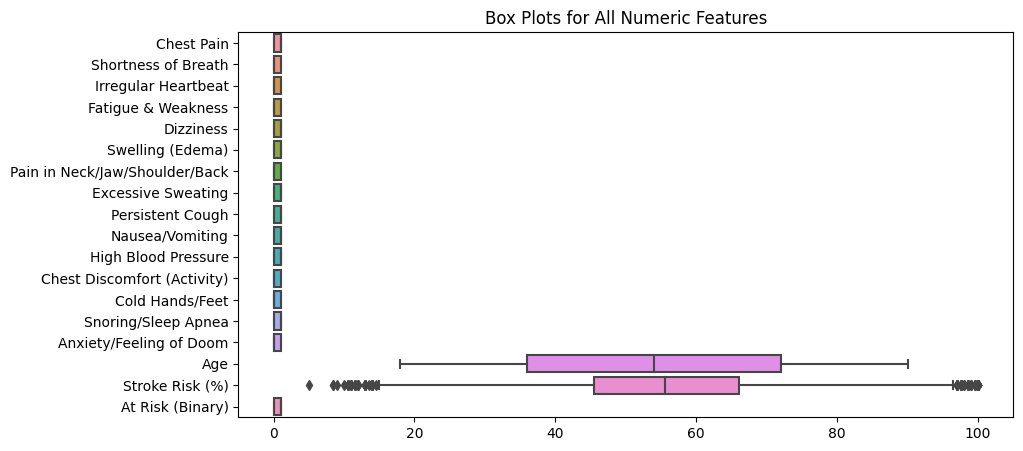

In [8]:
#Check for outliers
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns (exclude categorical)
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Plot boxplots for all numeric features
plt.figure(figsize=(10, 5))  # Adjust figure size
sns.boxplot(data=df[numeric_cols], orient="h")  # Horizontal boxplots
plt.title("Box Plots for All Numeric Features")
plt.show()

##  Model Training and Comparing 

We will train 4 classification models (Logistic, RF, XGBoost, DT) to determine which model gives the best performance on average when trained and validated on this dataset. 

We will use **Stratified K-fold** cross-validation to ensure that each fold in the cross-validation process maintains the same class distribution as the original dataset since we have a little class imbalance (0.65/0.35).

In [9]:
# separate the features from the target
# we will use the binary target for a classification problem
ftrs=['Age','Cold Hands/Feet']
X = df.drop(columns=["At Risk (Binary)","Stroke Risk (%)"])
y = df["At Risk (Binary)"]

In [10]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [11]:
# Define models 
models = {
    'Logistic Regression': LogisticRegression(solver='liblinear', random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)}

print("\n=== Cross-Validation Results ===")
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
for name, model in models.items():
    auc_scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='roc_auc')
    f1_scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='f1')

    print(f"{name}: AUC = {np.mean(auc_scores):.5f} ± {np.std(auc_scores):.5f} | "
          f"F1 = {np.mean(f1_scores):.5f} ± {np.std(f1_scores):.5f}")


=== Cross-Validation Results ===
Logistic Regression: AUC = 1.00000 ± 0.00000 | F1 = 0.99838 ± 0.00050
Decision Tree: AUC = 0.86868 ± 0.00208 | F1 = 0.90767 ± 0.00109
Random Forest: AUC = 0.98997 ± 0.00043 | F1 = 0.95853 ± 0.00104
XGBoost: AUC = 0.99983 ± 0.00003 | F1 = 0.99607 ± 0.00033


## Models Evaluation on Test set

In [12]:
print("\n=== Test Set Results ===")
for name, model in models.items():
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]  # for AUC

    auc = roc_auc_score(y_test, y_proba)
    f1 = f1_score(y_test, y_pred)

    print(f"{name}: AUC = {auc:.5f} | F1 = {f1:.5f}")


=== Test Set Results ===
Logistic Regression: AUC = 1.00000 | F1 = 0.99950
Decision Tree: AUC = 0.86581 | F1 = 0.90735
Random Forest: AUC = 0.99066 | F1 = 0.95863
XGBoost: AUC = 0.99988 | F1 = 0.99749


## Understand why the close perfect performance


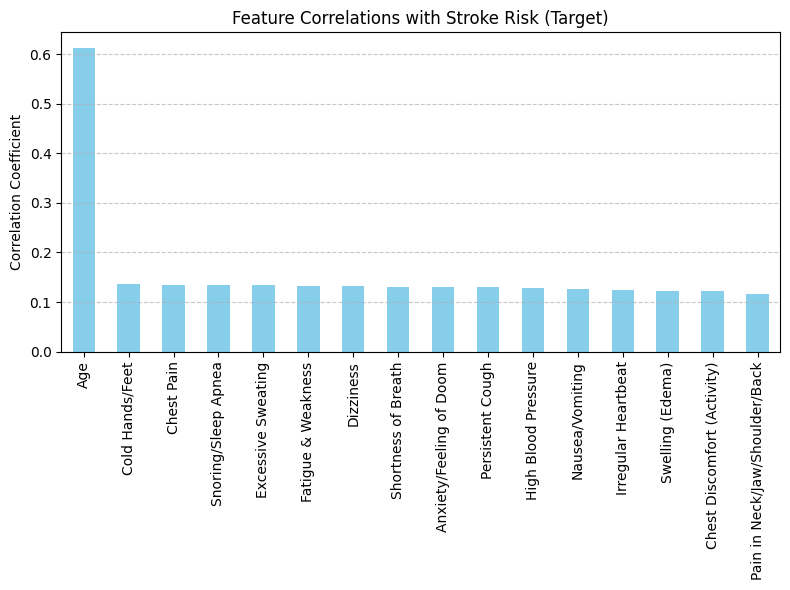

In [13]:
train_corr_df = pd.concat([X_train.copy(), y_train.rename('target')], axis=1)
corr = train_corr_df.corr(numeric_only=True)

# Get correlations with target, drop self-correlation, and sort
target_corr = corr['target'].drop('target').sort_values(ascending=False)

# Plot
plt.figure(figsize=(8, 6))
target_corr.plot(kind='bar', color='skyblue')
plt.title("Feature Correlations with Stroke Risk (Target)")
plt.ylabel("Correlation Coefficient")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

<Axes: xlabel='At Risk (Binary)', ylabel='Age'>

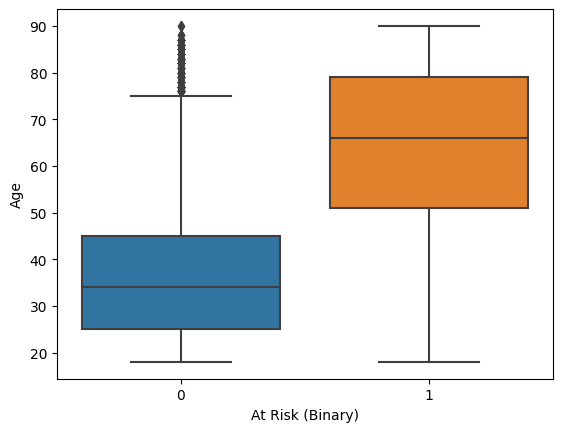

In [14]:
sns.boxplot(x=y, y=X['Age'])
#the age has no overlaps on 

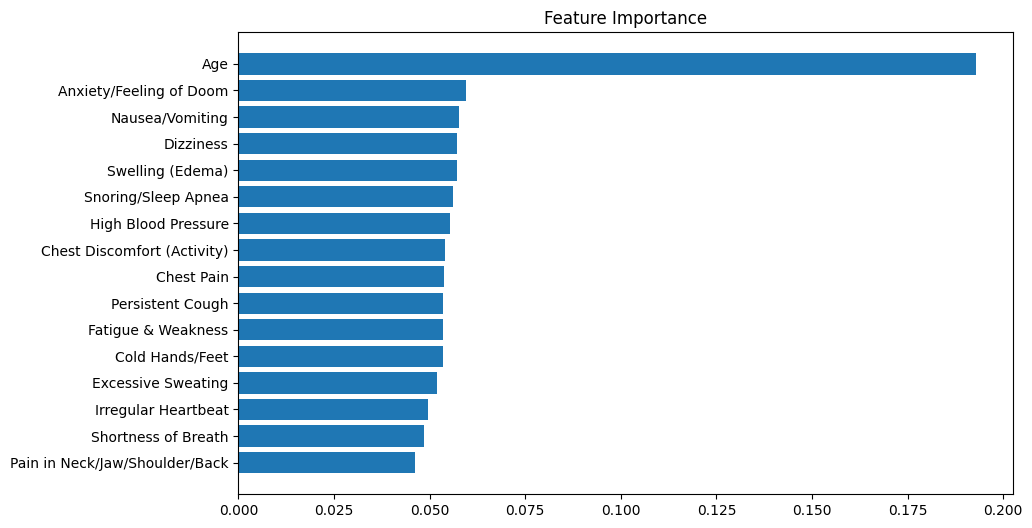

In [15]:
clf = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42).fit(X_train, y_train)
importances = clf.feature_importances_
features = X_train.columns
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10,6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.gca().invert_yaxis()
plt.title('Feature Importance')
plt.show()

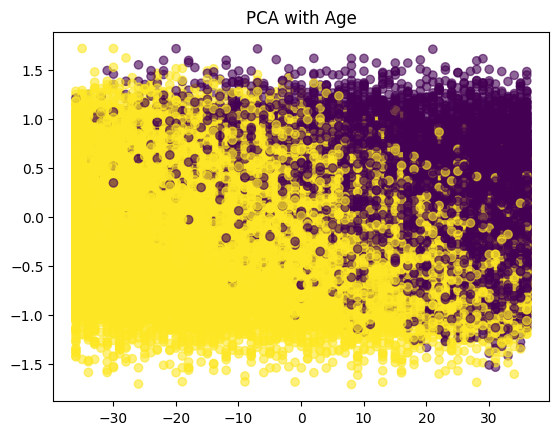

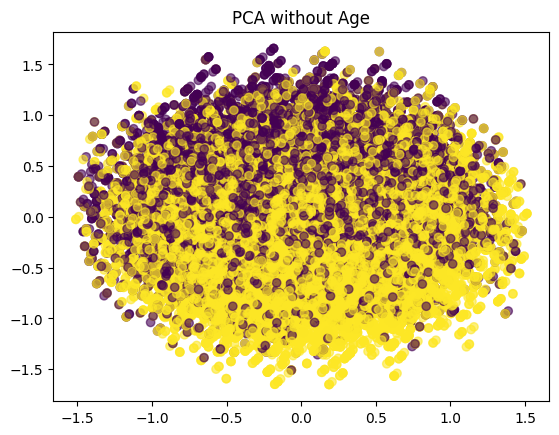

In [16]:
from sklearn.decomposition import PCA

# With Age
X_with_age=X
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_with_age)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y,  alpha=0.6)
plt.title("PCA with Age")
plt.show()

# Without Age
X_without_age=X.drop(columns=['Age'])
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_without_age)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, alpha=0.6)
plt.title("PCA without Age")
plt.show()


#### Can you see the difference ?

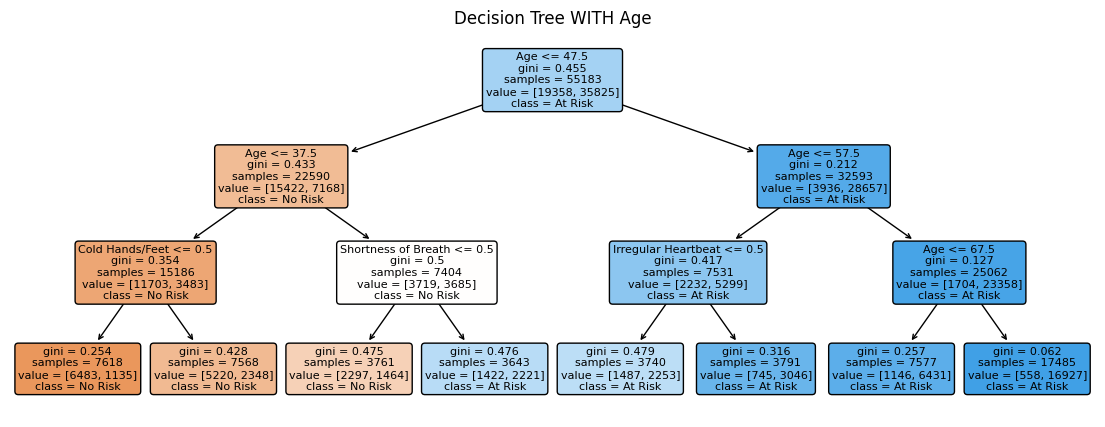

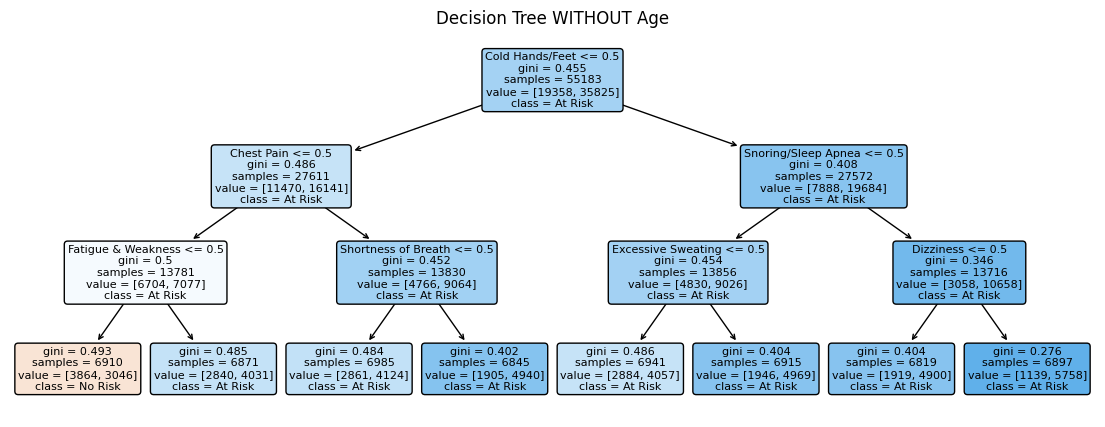

In [17]:
# let take one more look on the tree based method - we will use DT model for easier visualisation
# the model will probably use the age as the first split and build strong trees, right?

X_no_age = X.drop(columns=['Age'])
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_no_age, y, test_size=0.2, stratify=y, random_state=42)

tree_with_age = DecisionTreeClassifier(max_depth=3, random_state=42)
tree_with_age.fit(X_train, y_train)

tree_without_age = DecisionTreeClassifier(max_depth=3, random_state=42)
tree_without_age.fit(X_train2, y_train2)

# Tree WITH Age
plt.figure(figsize=(14, 5))
plot_tree(tree_with_age,feature_names=X.columns,class_names=['No Risk', 'At Risk'],filled=True,rounded=True,fontsize=8)
plt.title("Decision Tree WITH Age")
plt.show()

# Tree WITHOUT Age
plt.figure(figsize=(14, 5))
plot_tree(tree_without_age,feature_names=X_no_age.columns,class_names=['No Risk', 'At Risk'],filled=True,rounded=True,fontsize=8)
plt.title("Decision Tree WITHOUT Age")
plt.show()

## Conclusion

All models had strong performance, with XGBoost and Log Reg having near-perfect results. The consistency between cross-validation and test set performance shows that these models are not overfitting and the dataset likely has strong predictive signal, possibly from a dominant feature like Age. After examining feature correlation, and verifying the absence of data leakage, we conclude that this is a pretty separated dataset due to the dominant feature **Age** that allows for highly accurate predictions. 

The perfect age-based separation (no overlap between classes) hints at synthetic curation, even if medically inspired, which could limit real-world applicability.

#### ⛦What do you think? Did the visualizations enhance your understanding of the models and results?